# Project on Uber data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset=pd.read_csv("UberDataset.csv")
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
dataset.info()
dataset.shape # It is used to find out number of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


(1156, 7)

# Data Preprocessing

In [5]:
# code to replace missing data

dataset["PURPOSE"].fillna("NOT", inplace=True) # replaceing missing values in purpose column with "NOT"
dataset.dropna(inplace=True)
dataset

C:\Users\diksha\AppData\Local\Temp\ipykernel_6360\1828450090.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["PURPOSE"].fillna("NOT", inplace=True) # replaceing missing values in purpose column with "NOT"


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [6]:
# To change the datatype of the the column start_date and end_date

dataset["START_DATE"]=pd.to_datetime(dataset["START_DATE"], errors='coerce') # "errors=coerce" is used to identidy wrong values in date column
dataset["END_DATE"]=pd.to_datetime(dataset["END_DATE"], errors='coerce') 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [7]:
# Indroducing new columns to seperate date and time

from datetime import datetime

dataset["Start Date"]=pd.DatetimeIndex(dataset["START_DATE"]).date
dataset["Starting Time"]=pd.DatetimeIndex(dataset["START_DATE"]).hour

dataset["End Date"]=pd.DatetimeIndex(dataset["END_DATE"]).date
dataset["Ending Time"]=pd.DatetimeIndex(dataset["START_DATE"]).hour
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Start Date,Starting Time,End Date,Ending Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,2016-01-06,14.0
...,...,...,...,...,...,...,...,...,...,...,...
1150,NaT,NaT,Business,Kar?chi,Kar?chi,0.7,Meeting,NaT,NaN,NaT,NaN
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site,NaT,NaN,NaT,NaN
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting,NaT,NaN,NaT,NaN
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site,NaT,NaN,NaT,NaN


In [8]:
# Now we will insert a new column to identify the Time Period

dataset['Staring Time Period']=pd.cut(x=dataset['Starting Time'],bins=[0,10,15,19,24], labels=['Morning','Afternoon','Evening','Night'])
dataset['Ending Time Period']=pd.cut(x=dataset['Ending Time'],bins=[0,10,15,19,24], labels=['Morning','Afternoon','Evening','Night'])
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Start Date,Starting Time,End Date,Ending Time,Staring Time Period,Ending Time Period
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,2016-01-01,21.0,Night,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,2016-01-02,1.0,Morning,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,2016-01-02,20.0,Night,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,2016-01-05,17.0,Evening,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,2016-01-06,14.0,Afternoon,Afternoon


In [9]:
dataset.dropna(inplace=True)
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Start Date,Starting Time,End Date,Ending Time,Staring Time Period,Ending Time Period
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,2016-01-01,21.0,Night,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,2016-01-02,1.0,Morning,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,2016-01-02,20.0,Night,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,2016-01-05,17.0,Evening,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,2016-01-06,14.0,Afternoon,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13.0,2016-12-12,13.0,Afternoon,Afternoon
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13.0,2016-12-12,13.0,Afternoon,Afternoon
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,2016-12-12,14.0,Afternoon,Afternoon
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,2016-12-12,17.0,Evening,Evening


# Data Visualisation

<Axes: xlabel='count', ylabel='PURPOSE'>

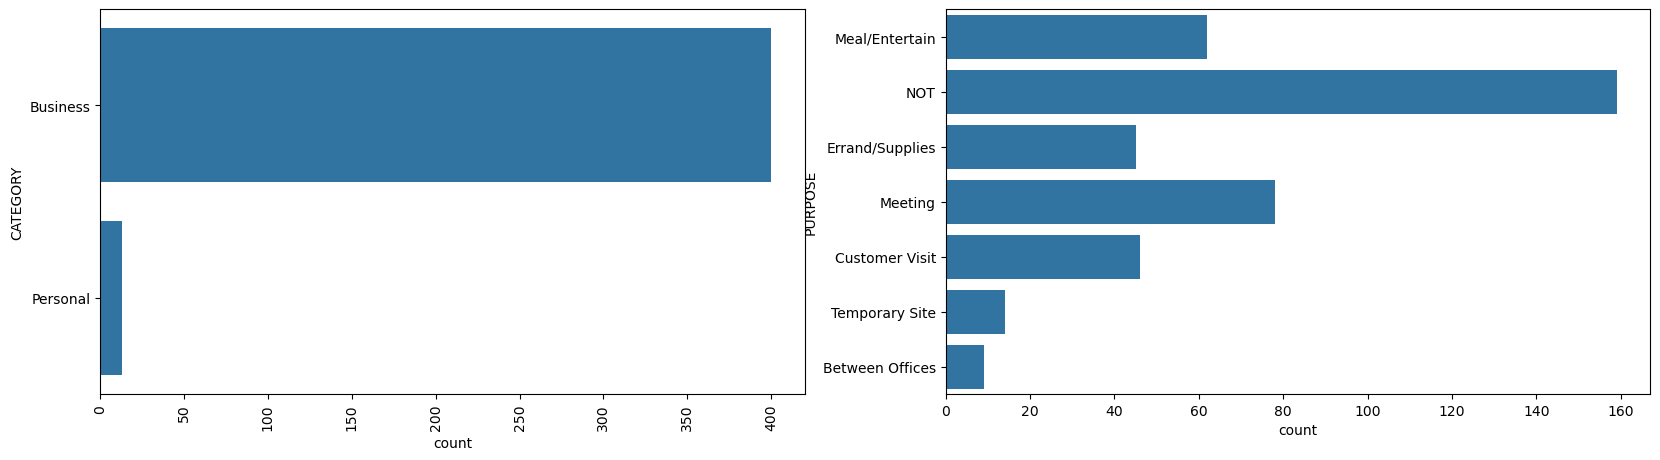

In [10]:
# Problem 1: In which categoy and fo which purpose people book most uber rides

plt.figure(figsize=(20,5))

plt.subplot(1,2,1) # For plotting graph 1
sns.countplot(dataset['CATEGORY'])
plt.xticks(rotation=90) # 'xticks' is used to rotate the values on x-axis 

plt.subplot(1,2,2) # For plotting graph 2
sns.countplot(dataset['PURPOSE'])



<Axes: xlabel='count', ylabel='Staring Time Period'>

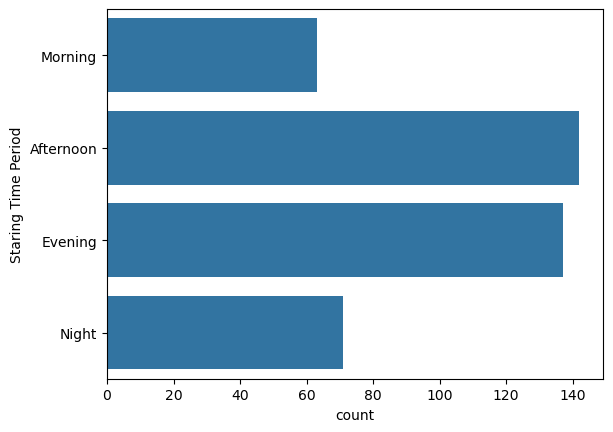

In [11]:
# Problem 2: At what time do people book cabs most from uber

sns.countplot(dataset['Staring Time Period'])

In [12]:
# Problem 3: In which month do people book uber rides less frequently

dataset['MONTH']=pd.DatetimeIndex(dataset['START_DATE']).month # It extract month from 'START DATE'

# assigning string names to months
month_label={1.0:'Jan', 2.0:'Feb', 3:'Mar', 4.0:'Apr', 5.0:'May', 6.0:'Jun', 7.0:'Jul', 8.0:'Aug', 9.0:'Sep', 10.0: 'Oct', 11.0:'Nov', 12.0:'Dec'}

dataset['MONTH']=dataset.MONTH.map(month_label) # Replace Numbers with string names
mon=dataset.MONTH.value_counts(sort=False) # It calculates and counts every month
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Start Date,Starting Time,End Date,Ending Time,Staring Time Period,Ending Time Period,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,2016-01-01,21.0,Night,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,2016-01-02,1.0,Morning,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,2016-01-02,20.0,Night,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,2016-01-05,17.0,Evening,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,2016-01-06,14.0,Afternoon,Afternoon,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13.0,2016-12-12,13.0,Afternoon,Afternoon,Dec
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13.0,2016-12-12,13.0,Afternoon,Afternoon,Dec
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,2016-12-12,14.0,Afternoon,Afternoon,Dec
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,2016-12-12,17.0,Evening,Evening,Dec


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

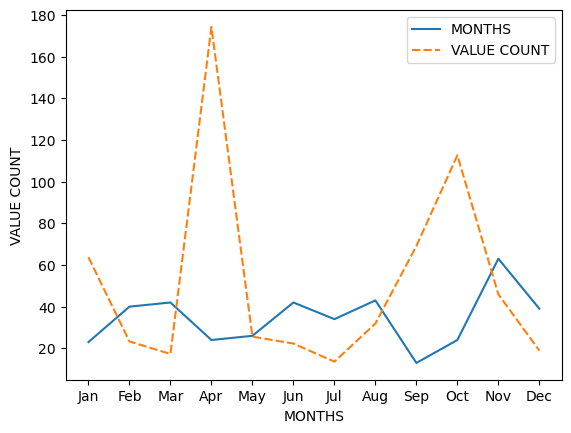

In [13]:
df=pd.DataFrame({
    "MONTHS":mon.values, # Total count of every month
    "VALUE COUNT": dataset.groupby('MONTH', sort=False)['MILES'].max()  # value of max. miles of every month
})

p=sns.lineplot(data=df) # Plotting Line graph
p.set(xlabel='MONTHS', ylabel='VALUE COUNT')


In [14]:
# Conclusion: in DEC, Jan people book uber rides less frequently

In [15]:
# Problem 4: On which day in a week people book more uber rides

dataset['DAY']=dataset.START_DATE.dt.weekday
day_label={0:'MON', 1:'TUE', 2:'WED', 3:'THU', 4:'FRI', 5:'SAT', 6:'SUN'}
dataset['DAY']=dataset['DAY'].map(day_label)
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Start Date,Starting Time,End Date,Ending Time,Staring Time Period,Ending Time Period,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,2016-01-01,21.0,Night,Night,Jan,FRI
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,2016-01-02,1.0,Morning,Morning,Jan,SAT
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,2016-01-02,20.0,Night,Night,Jan,SAT
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,2016-01-05,17.0,Evening,Evening,Jan,TUE
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,2016-01-06,14.0,Afternoon,Afternoon,Jan,WED


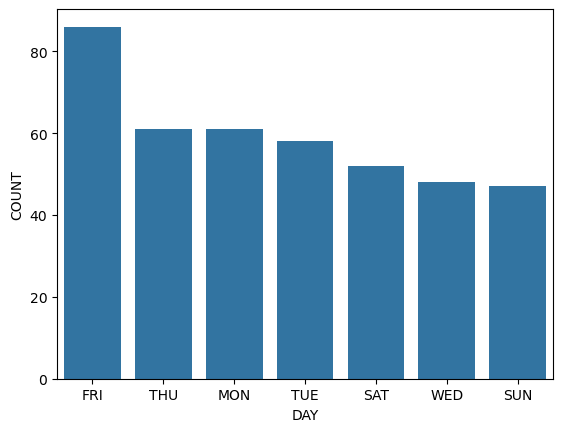

In [16]:
day_label=dataset.DAY.value_counts()

sns.barplot(x=day_label.index, y=day_label)
plt.xlabel('DAY')
plt.ylabel('COUNT')
plt.show()

<Axes: ylabel='MILES'>

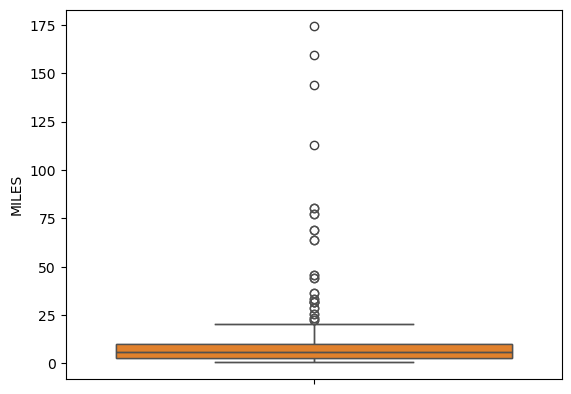

In [18]:
# Poblem 5: For travelling how many miles do people book Uber

sns.boxplot(dataset['MILES'])

<Axes: ylabel='MILES'>

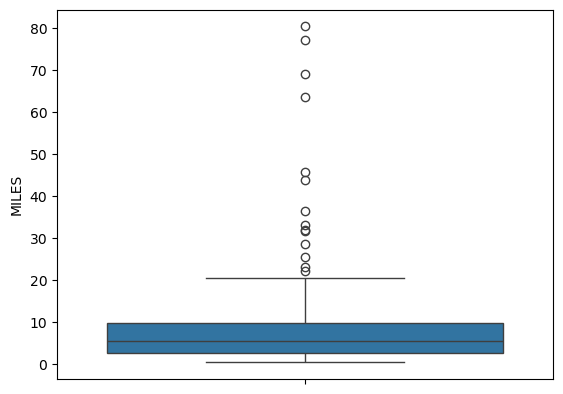

In [19]:
# For checking the miles only upto 100
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

C:\Users\diksha\AppData\Local\Temp\ipykernel_6360\2171558739.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

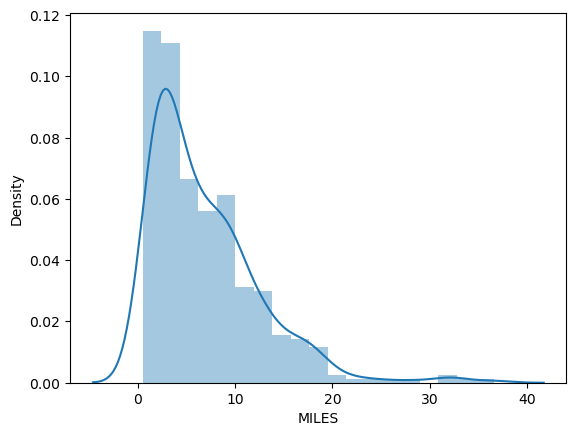

In [21]:
# creating distplot for ploting data upto 40 miles

sns.distplot(dataset[dataset['MILES']<40]['MILES'])